In [1]:
import gpflow
import numpy as np

/home/hejia/anaconda2/envs/rllab3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hejia/anaconda2/envs/rllab3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
with gpflow.defer_build():
    X = np.random.rand(20, 1)
    Y = np.sin(12 * X) + 0.66 * np.cos(25 * X) + np.random.randn(20, 1) * 0.01
    m = gpflow.models.GPR(X, Y, kern=gpflow.kernels.Matern32(1) + gpflow.kernels.Linear(1))

In [4]:
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/kernels/0/lengthscales,Parameter,None,+ve,True,(),True,1.0
GPR/kern/kernels/0/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/kernels/1/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0


In [5]:
m.likelihood.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0


In [11]:
m.kern.kernels[0].lengthscales = 0.5
m.likelihood.variance = 0.01
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/kernels/0/lengthscales,Parameter,None,+ve,True,(),True,0.5
GPR/kern/kernels/0/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/kernels/1/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


In [12]:
m.read_trainables()

{'GPR/kern/kernels/0/lengthscales': array(0.5),
 'GPR/kern/kernels/0/variance': array(1.),
 'GPR/kern/kernels/1/variance': array(1.),
 'GPR/likelihood/variance': array(0.01)}

In [16]:
m.kern.kernels[0].lengthscales.transform = gpflow.transforms.Exp()
m.read_trainables()
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/kernels/0/lengthscales,Parameter,None,Exp,True,(),True,0.5
GPR/kern/kernels/0/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/kernels/1/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


In [17]:
m.kern.kernels[1].variance.trainable = False
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/kernels/0/lengthscales,Parameter,None,Exp,True,(),True,0.5
GPR/kern/kernels/0/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/kernels/1/variance,Parameter,None,+ve,False,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


In [18]:
m.read_trainables()

{'GPR/kern/kernels/0/lengthscales': array(0.5),
 'GPR/kern/kernels/0/variance': array(1.),
 'GPR/likelihood/variance': array(0.01)}

In [19]:
m.kern.kernels[1].variance.trainable = True
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/kernels/0/lengthscales,Parameter,None,Exp,True,(),True,0.5
GPR/kern/kernels/0/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/kernels/1/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


In [20]:
m.kern.kernels[0].variance.prior = gpflow.priors.Gamma(2, 3)
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/kernels/0/lengthscales,Parameter,None,Exp,True,(),True,0.5
GPR/kern/kernels/0/variance,Parameter,"Ga(2.0,3.0)",+ve,True,(),True,1.0
GPR/kern/kernels/1/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


In [21]:
m.compile()
opt = gpflow.train.ScipyOptimizer()
opt.minimize(m)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 0.908886
  Number of iterations: 38
  Number of functions evaluations: 45


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 0.908886
  Number of iterations: 38
  Number of functions evaluations: 45


# Building new models

In [22]:
import tensorflow as tf


class LinearMulticlass(gpflow.models.Model):
    def __init__(self, X, Y, name=None):
        super().__init__(name=name) # always call the parent constructor
        
        self.X = X.copy()
        self.Y = Y.copy()
        
        self.num_data, self.input_dim = X.shape
        _, self.num_classes = Y.shape
        
        # make some parameters
        self.W = gpflow.Param(np.random.randn(self.input_dim, self.num_classes))
        self.b = gpflow.Param(np.random.randn(self.num_classes))
        
    @gpflow.params_as_tensors
    def _build_likelihood(self):
        p = tf.nn.softmax(tf.matmul(self.X, self.W) + self.b) 
        return tf.reduce_sum(tf.log(p) * self.Y)

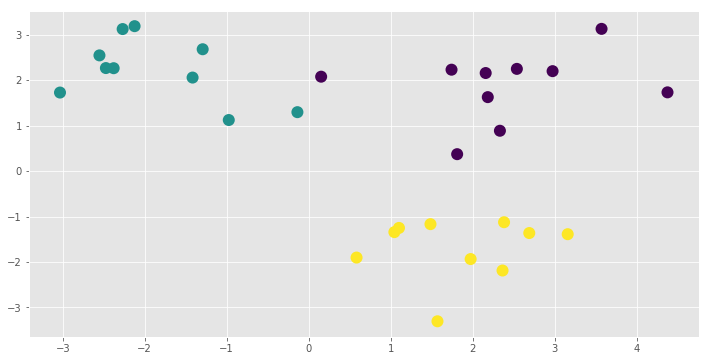

In [23]:
X = np.vstack([np.random.randn(10, 2) + [2, 2],
               np.random.randn(10, 2) + [-2, 2],
               np.random.randn(10, 2) + [2, -2]])
Y = np.repeat(np.eye(3), 10, 0)

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
plt.scatter(X[:,0], X[:,1], 100, np.argmax(Y, 1), lw=2, cmap=plt.cm.viridis)

In [24]:
m = LinearMulticlass(X, Y)
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
LinearMulticlass/W,Parameter,None,(none),True,"(2, 3)",True,"[[-1.0872559819048155, -0.7745123668484316, 0...."
LinearMulticlass/b,Parameter,None,(none),True,"(3,)",True,"[1.7248637116697414, -0.5212431902078567, -0.8..."


In [25]:
opt = gpflow.train.ScipyOptimizer()
opt.minimize(m)
m.as_pandas_table()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 0.000022
  Number of iterations: 23
  Number of functions evaluations: 25


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 0.000022
  Number of iterations: 23
  Number of functions evaluations: 25


,class,prior,transform,trainable,shape,fixed_shape,value
LinearMulticlass/W,Parameter,None,(none),True,"(2, 3)",True,"[[13.908852735372395, -16.737121345627926, 1.8..."
LinearMulticlass/b,Parameter,None,(none),True,"(3,)",True,"[-15.416861018272462, 15.170687032055449, 0.62..."


In [26]:
xx, yy = np.mgrid[-4:4:200j, -4:4:200j]
X_test = np.vstack([xx.flatten(), yy.flatten()]).T
f_test = np.dot(X_test, m.W.read_value()) + m.b.read_value()
p_test = np.exp(f_test)
p_test /= p_test.sum(1)[:,None]

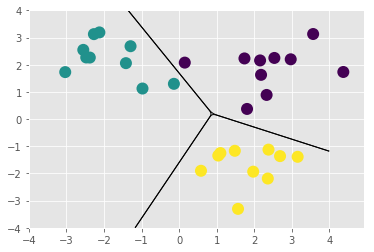

In [27]:
for i in range(3):
    plt.contour(xx, yy, p_test[:,i].reshape(200,200), [0.5], colors='k', linewidths=1)
plt.scatter(X[:,0], X[:,1], 100, np.argmax(Y, 1), lw=2, cmap=plt.cm.viridis)